# EDA of Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('tutorial_cleaned_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [4]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [6]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10729,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10752,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [7]:
## The app names are repeted. We must remove the columns with duplicate app names
## Only one row is required per app as per business logic

df.drop_duplicates(subset=['App'], keep='first', inplace=True) ## Will keep the first row for every app and deleted the remaining duplicate rows

In [8]:
df.shape

(9659, 16)

# Explore Data more

In [9]:
## Finding the numerical and categorical features 

numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Numerical Columns : ', numerical_features)
print('Categorical Columns : ', categorical_features)

Numerical Columns :  ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
Categorical Columns :  ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [10]:
## Find the unique value counts of every categorical columns

for col in categorical_features :
    print('Column Name : ',col)
    print(df[col].value_counts())
    print()

Column Name :  App
App
iHoroscope - 2018 Daily Horoscope & Astrology         1
Photo Editor & Candy Camera & Grid & ScrapBook        1
Coloring book moana                                   1
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1
Sketch - Draw & Paint                                 1
                                                     ..
Pink Silver Bow Keyboard Theme                        1
Art Drawing Ideas                                     1
Anime Manga Coloring Book                             1
Easy Origami Ideas                                    1
I Creative Idea                                       1
Name: count, Length: 9659, dtype: int64

Column Name :  Category
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNI

In [11]:
## Value counts in terms of percentage 

for col in categorical_features:
    print('Column Name : ',col)
    print(df[col].value_counts(normalize=True) * 100)
    print()

Column Name :  App
App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Pink Silver Bow Keyboard Theme                        0.010353
Art Drawing Ideas                                     0.010353
Anime Manga Coloring Book                             0.010353
Easy Origami Ideas                                    0.010353
I Creative Idea                                       0.010353
Name: proportion, Length: 9659, dtype: float64

Column Name :  Category
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODU

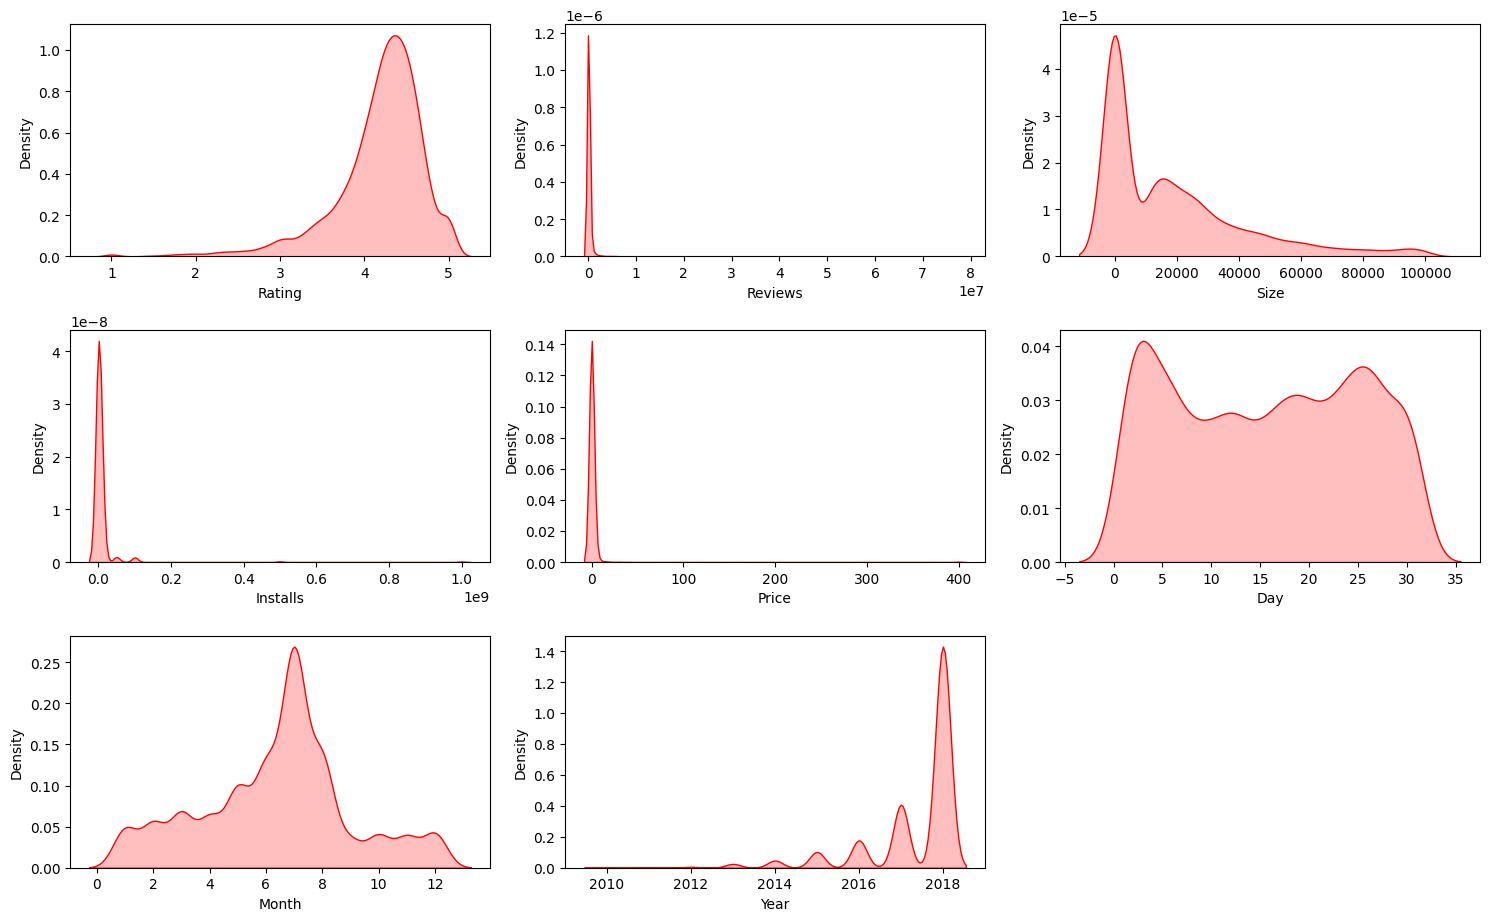

In [12]:
## Proportion Count for every numerical Column
## Distribution of every numerical column
plt.figure(figsize=(15, 15))
for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[numerical_features[i]], fill = True, color = 'r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## Observations 

Rating, year are left skewed <br>
reviews, size, installs, price are right skewed <br>
Day and Month are normal

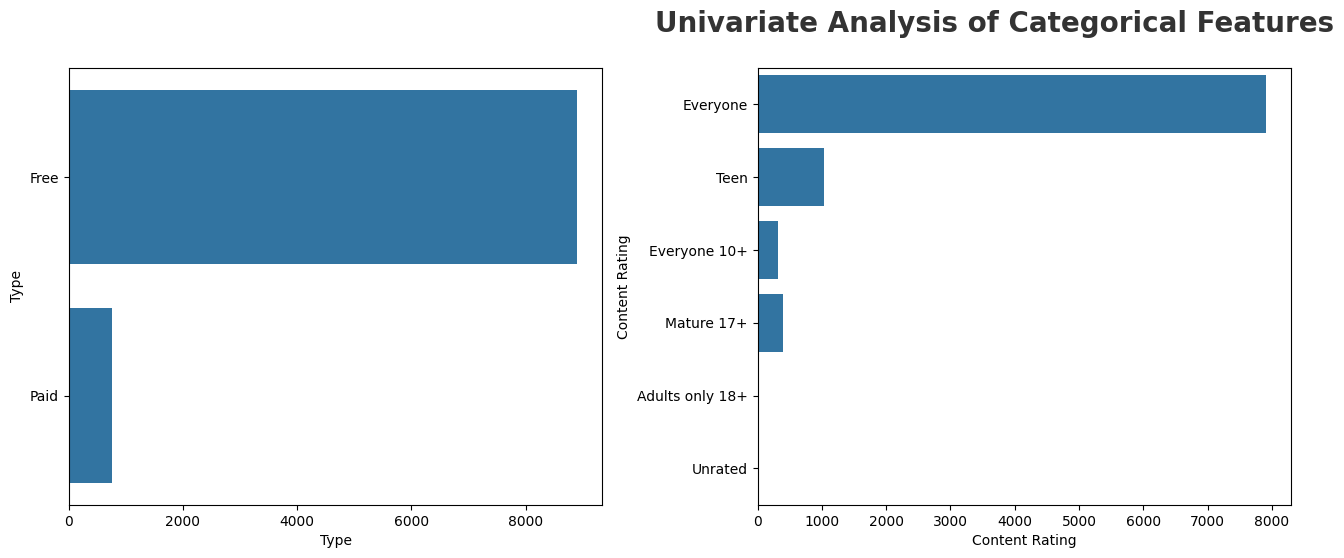

In [ ]:
## Analisis of categorical features

plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
categories = ['Type', 'Content Rating']
for i in range(0, len(categories)):
    plt.subplot(3,3, i+ 1)
    sns.countplot(df[categories[i]])
    plt.xlabel(categories[i])
    plt.tight_layout()   ## tight_layout avoids the overlapping of the charts


# Questions 

### Which is the most popular category ??


In [28]:
counts = df['Category'].value_counts()
counts

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [49]:
print(type(counts))
counts.index

<class 'pandas.core.series.Series'>


Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS', 'COMMUNICATION',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
       'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'WEATHER',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'EVENTS', 'PARENTING', 'COMICS',
       'BEAUTY'],
      dtype='object', name='Category')

([<matplotlib.patches.Wedge at 0x171aa4d1ae0>,
 [Text(0.9104336510162334, 0.6173415319717697, 'FAMILY'),
  Text(0.07382501924606838, 1.0975198706781202, 'GAME'),
  Text(-0.5405748140352247, 0.9580077611537301, 'TOOLS'),
  Text(-0.8747084469429056, 0.6669971010782058, 'BUSINESS'),
  Text(-1.0189000458698978, 0.4145391375085353, 'MEDICAL'),
  Text(-1.0898980768739137, 0.1487352749906513, 'PERSONALIZATION'),
  Text(-1.0935544424360983, -0.11890618751046707, 'PRODUCTIVITY'),
  Text(-1.0333214974990068, -0.3771560456978123, 'LIFESTYLE'),
  Text(-0.9187818301229784, -0.6048470456535855, 'FINANCE'),
  Text(-0.7662860987480665, -0.7891803436892411, 'SPORTS'),
  Text(-0.5866520089876275, -0.9305049276337987, 'COMMUNICATION'),
  Text(-0.39407674892349326, -1.0269875928938432, 'HEALTH_AND_FITNESS'),
  Text(-0.19836883179114842, -1.0819657141396928, 'PHOTOGRAPHY'),
  Text(-0.008050261394399667, -1.0999705420107768, 'NEWS_AND_MAGAZINES'),
  Text(0.16767668464174845, -1.0871451280429636, 'SOCIAL'),


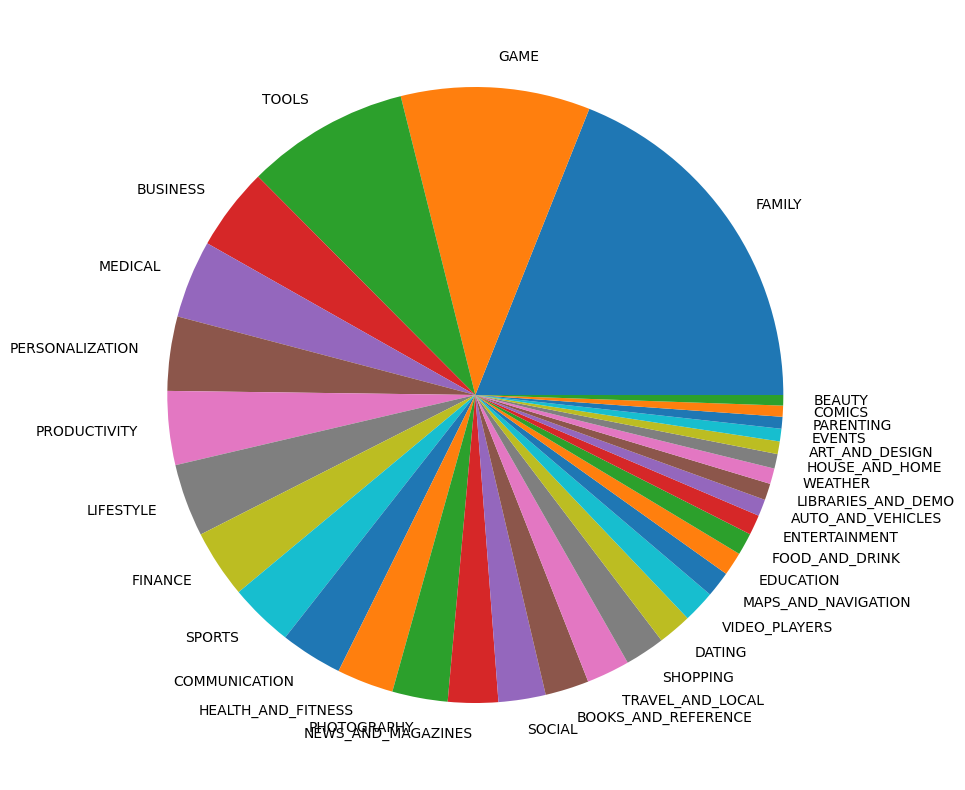

In [33]:
plt.figure(figsize=(15, 10))
plt.pie(counts, labels=counts.index)

<Axes: xlabel='count', ylabel='Category'>

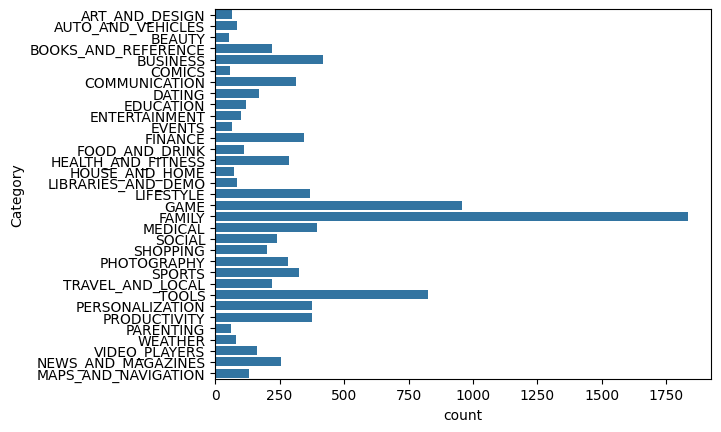

In [ ]:
sns.countplot(df['Category'])  ## You can also use a count plot for finding the count of values

## Top 10 Categories

In [56]:
## Make a dataframe of value_counts 

count_df = pd.DataFrame(df['Category'].value_counts())
## values_count() return the counts in sorted order

In [57]:
count_df

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [ ]:
type(count_df)  ## Category is the index and count is the only column

pandas.core.frame.DataFrame

In [55]:
count_df.index

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS', 'COMMUNICATION',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
       'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'WEATHER',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'EVENTS', 'PARENTING', 'COMICS',
       'BEAUTY'],
      dtype='object', name='Category')

In [58]:
## Now using this count_df we can easily code the barplot, pie chart, etc 

extract_top_10 = count_df[:10]
extract_top_10

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [ ]:
extract_top_10['count']   ## Since category is the index.... it will also be shown .....category is not the column

Category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x171aa6a0790>,
 [Text(0.6620113388364933, 0.8784878981818213, 'FAMILY'),
  Text(-0.7605473774965761, 0.7947123294520356, 'GAME'),
  Text(-1.0951003863677835, -0.10370700929605121, 'TOOLS'),
  Text(-0.8240415251025276, -0.7286669780542415, 'BUSINESS'),
  Text(-0.46378919549096376, -0.9974465309708811, 'MEDICAL'),
  Text(-0.05052451171005798, -1.0988390572401676, 'PERSONALIZATION'),
  Text(0.3592971969312048, -1.0396660638288524, 'PRODUCTIVITY'),
  Text(0.7152582230236136, -0.8357066916072307, 'LIFESTYLE'),
  Text(0.9640762784934955, -0.529676249463889, 'FINANCE'),
  Text(1.0852227048141183, -0.1796988618659825, 'SPORTS')])

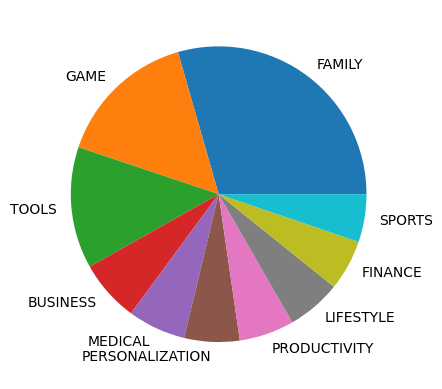

In [52]:
plt.pie(x = extract_top_10['count'], labels=extract_top_10.index)

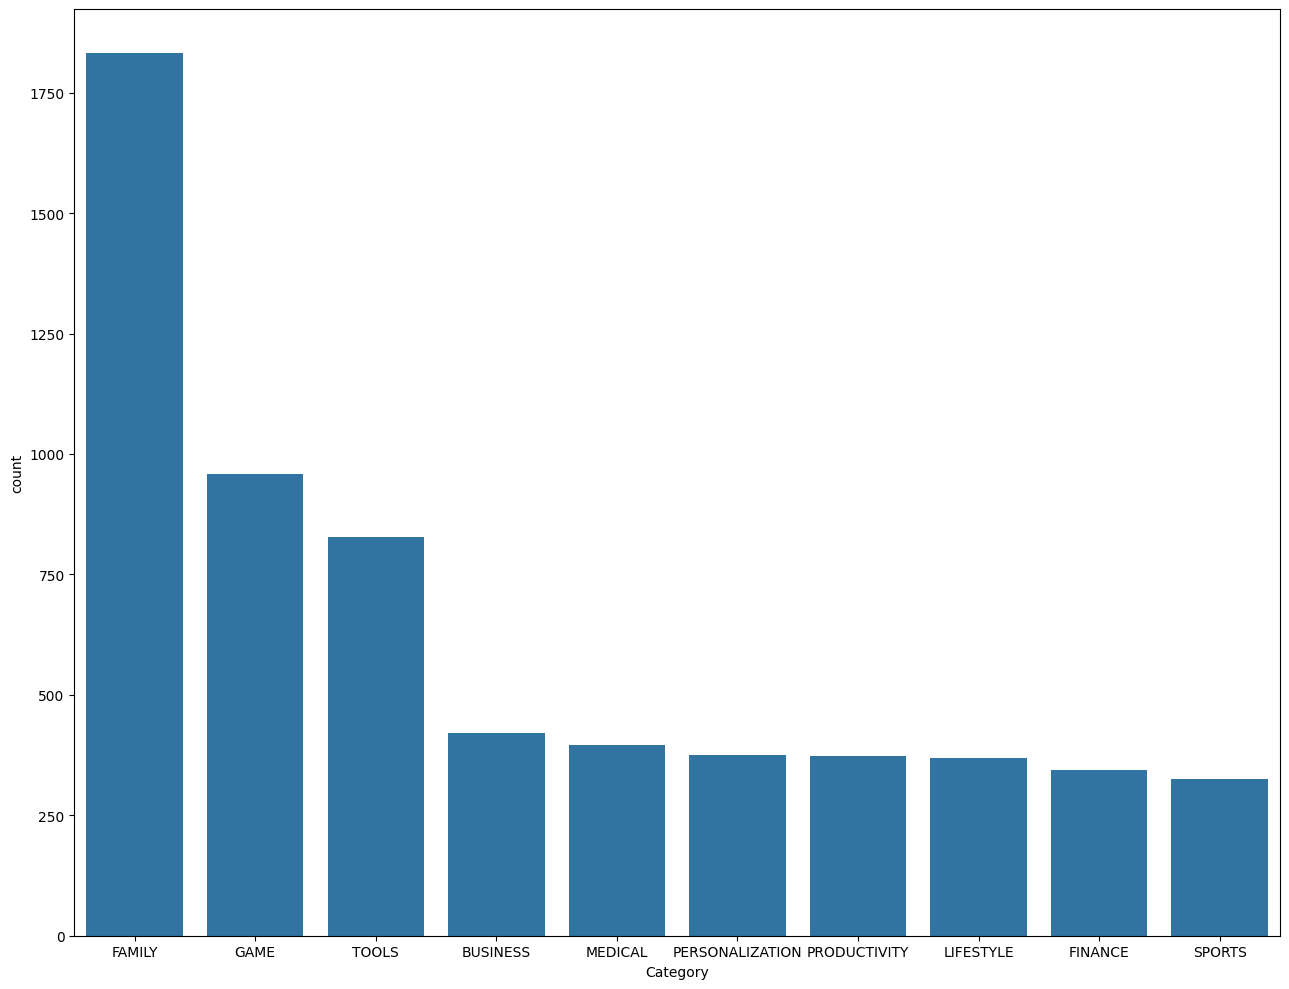

In [63]:
plt.figure(figsize=(13,10))
sns.barplot(x=extract_top_10.index,y='count', data=extract_top_10)
plt.tight_layout()


# Assignments

1. Which category has the largest number of installations ?<br>
Ans :- Group By Category and find count of installs

2. What are the Top 5 most installed Apps in Each popular Categories ?<br>
Ans :- for appname in df['Category'].unique_values() : <br>
            find the newDf = df[df['Category'] == appname] <br>
            and then do newDf['Install'].value_counts()<br>
            select top 5 value counts 

3. How many apps are there on Google Play Store which get 5 ratings ?<br>
Ans :- df[df['Rating'] == 5]['Category'].unique()